# Imports

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 

# Exercice 1

### Loading data

In [2]:
iris = datasets.load_iris()

In [3]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Summarizing Data

In [5]:
# We use the fonction describe to summarize the data 
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Is there missing values ? 
print(iris.isnull().values.any())

False


**Normally there is no missing values in the dataframe "Iris".**

### Plotting Data

In [7]:
# Separation of data

In [8]:
a = iris["sepal length (cm)"]
b = iris["sepal width (cm)"]
c = iris["petal length (cm)"]
d = iris["petal width (cm)"]
e = iris["target"]

In [9]:
# Simple scatter plot

Text(0, 0.5, 'Sepal Width')

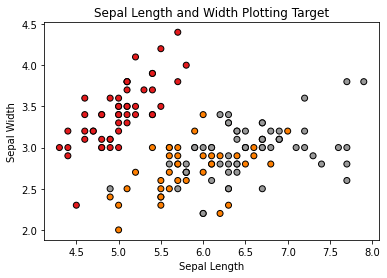

In [10]:
plt.scatter(a, b, c=e, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title('Sepal Length and Width Plotting Target')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

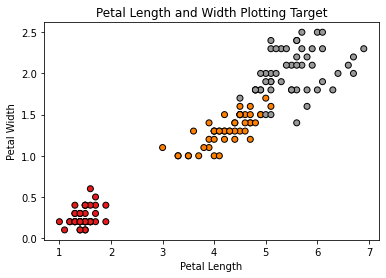

In [11]:
plt.scatter(c, d, c=e, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title('Petal Length and Width Plotting Target')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Length')

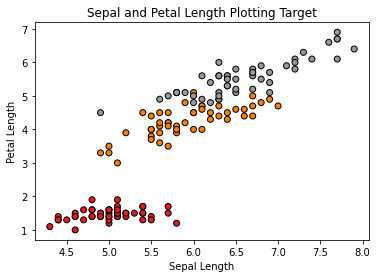

In [12]:
plt.scatter(a, c, c=e, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title('Sepal and Petal Length Plotting Target')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Width')

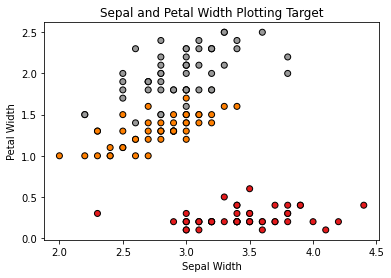

In [13]:
plt.scatter(b, d, c=e, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title('Sepal and Petal Width Plotting Target')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

In [14]:
# 3d Scatter Plot

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

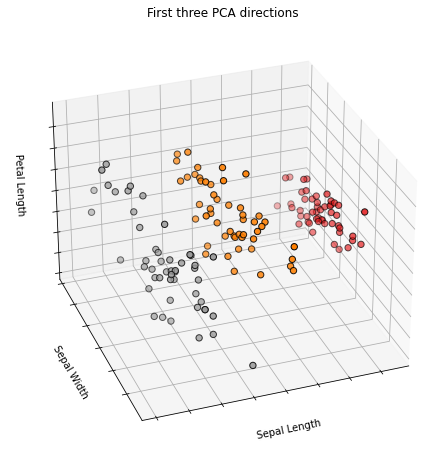

In [15]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=e,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("Sepal Length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length")
ax.w_zaxis.set_ticklabels([])

In [74]:
# Conclusion

**Conclusion :** We can notice that there are 3 categories of iris. Orthogonal cuts seems to be a good idea. However, we must randomly split data from train and test to be sure to have a good clasifier. It can be difficult to make a difference between orange and grey members. 

# 

# Exercice 2

## Separation Train and Dataset

In [16]:
from random import shuffle
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [17]:
# create dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


## Realizing Decision Trees

In [18]:
# Without Max Deepth

[Text(159.42857142857142, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [34, 35, 31]'),
 Text(79.71428571428571, 427.11428571428576, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(239.1428571428571, 427.11428571428576, 'X[2] <= 4.85\ngini = 0.498\nsamples = 66\nvalue = [0, 35, 31]'),
 Text(159.42857142857142, 349.4571428571429, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(318.85714285714283, 349.4571428571429, 'X[3] <= 1.75\ngini = 0.202\nsamples = 35\nvalue = [0, 4, 31]'),
 Text(239.1428571428571, 271.8, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(159.42857142857142, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(318.85714285714283, 194.14285714285717, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(239.1428571428571, 116.48571428571432, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(398.57142857142856, 116.48571428571432, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nval

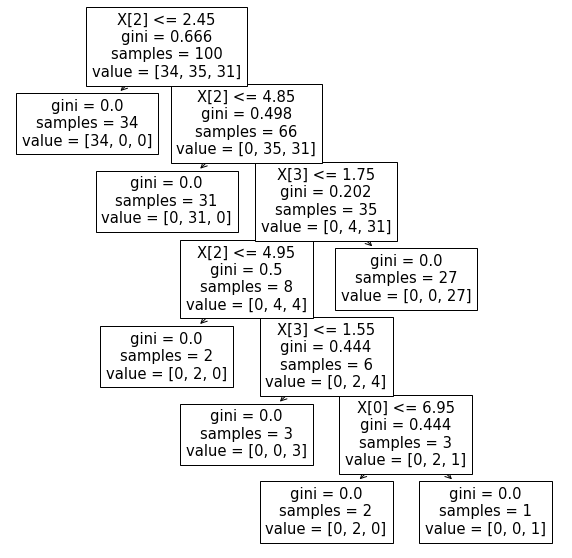

In [19]:
clf = tree.DecisionTreeClassifier(criterion = "gini")
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
            feature_names=iris.feature_names,
            class_names=iris.target_names,
            filled=True, rounded=True,
            special_characters=True)
plt.figure(figsize=(10,10))
plot_tree(clf)

In [20]:
acc1 = clf.score(X_test, y_test)
print("The accuracy is",acc1)

The accuracy is 0.94


In [21]:
Result = clf.predict(X_test)
confusion_matrix(y_test,Result )

array([[16,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]])

**Conclusion :** It could be useful to stop the growing of the tree, with a maximum depth of 2. 

In [22]:
# With Max Deepth

[Text(223.2, 453.0, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [34, 35, 31]'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(334.79999999999995, 271.8, 'X[2] <= 4.85\ngini = 0.498\nsamples = 66\nvalue = [0, 35, 31]'),
 Text(223.2, 90.59999999999997, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(446.4, 90.59999999999997, 'gini = 0.202\nsamples = 35\nvalue = [0, 4, 31]')]

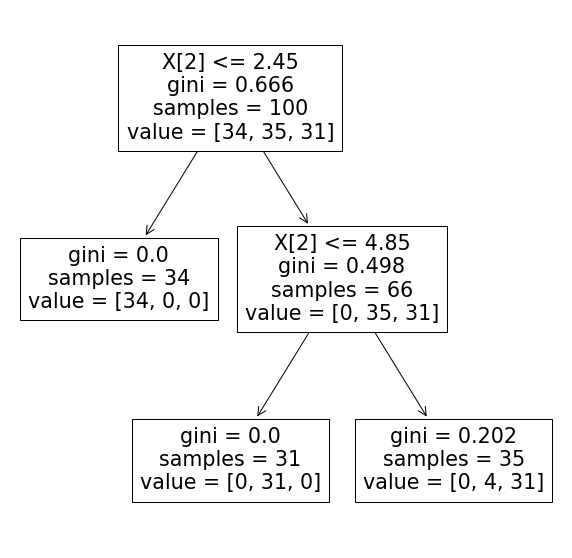

In [29]:
clf2 = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_split=2, min_samples_leaf=1)
clf2 = clf2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf2, out_file=None,
            feature_names=iris.feature_names,
            class_names=iris.target_names,
            filled=True, rounded=True,
            special_characters=True)
plt.figure(figsize=(10,10))
plot_tree(clf2)

In [30]:
acc1 = clf2.score(X_test, y_test)
print("The accuracy is",acc1)

The accuracy is 0.94


In [31]:
Result = clf2.predict(X_test)
confusion_matrix(y_test,Result )

array([[16,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]])

In [120]:
#Conclusion

**Final Conclusion :** Our prediction has an accuracy of 94%. It can be easily understandable if we stop the growing of the tree. In addition, we obtain nearly the same results. 

We make 3 mistakes in our prediction. 

## Comparison with other models 

In [32]:
#K-nearest neighbors classifier

In [33]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.98

In [34]:
Result3 = neigh.predict(X_test)
confusion_matrix(y_test,Result3)

array([[16,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 18]])

**Conclusion :** This method seems to provide better results but it can be due to the split train/test realized at the begining. 

In [35]:
# Dummy Classifiers

In [36]:
Dum = DummyClassifier()
Dum.fit(X_train,y_train)
Dum.score(X_test,y_test)

/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.3

In [38]:
Result4 = Dum.predict(X_test)
confusion_matrix(y_test,Result4)

array([[9, 4, 3],
       [6, 6, 3],
       [7, 5, 7]])

**Conclusion :** This method gives less good results than the two previous one. It is not a good method to predict on this dataset. 

# 

# General Conclusion

The best method to predict target on the dataset Iris seems to be the k-neighbors classifiers. 

I think that thanks to a tuning of parameters we could obtain better results with the Decision Trees. 